<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** 
- Christa Itzel Barrios Martinez
- Javier Alejandro Contreras Figueroa

**Fecha:** 15 de febrero del 2024.

**Expediente** : 
- 739328
- 739708
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/ChristaBarrios/Tarea_5_CIBarrios_JAContreras.git

# Tarea 5: Clase 13

Código de solución estudiante 1

In [5]:
data = pd.read_excel('https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true')
data.head(20)

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.6320
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.4090
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.1540
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.2730
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.2300
5,11,1990-01-01,1990,Jan,Mon,11,1081,1034,95,14.6625,8.5,991.1800
6,12,1990-01-01,1990,Jan,Mon,12,1093,1038,95,14.8500,8.2,992.9360
7,13,1990-01-01,1990,Jan,Mon,13,1040,1039,84,14.7094,9.1,992.3160
8,14,1990-01-01,1990,Jan,Mon,14,929,1028,72,14.7531,8.9,991.2440
9,15,1990-01-01,1990,Jan,Mon,15,779,1008,67,14.5688,9.5,982.6840


In [6]:
data = data[['date','Energy (kWh)']]
data = data.set_index('date').resample('M').mean()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1990-01-31 to 2014-12-31
Freq: M
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Energy (kWh)  300 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [8]:
data.describe()

,Energy (kWh)
count,300.000000
mean,358.003342
std,82.084724
min,194.230820
25%,294.428858
50%,350.177359
75%,423.025473
max,560.337909


In [67]:
lf = LinearForecast(data)

In [10]:
lf.adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -2.242267084960264
p-valor: 0.19126398271950007
Valores Críticos:
   1%: -3.4534232986669546
   5%: -2.8716994185534745
   10%: -2.5721833625116144
La serie es probablemente no estacionaria.


In [11]:
LinearForecast(data.diff().dropna()).adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -11.853523395780165
p-valor: 7.115964313672464e-22
Valores Críticos:
   1%: -3.4534232986669546
   5%: -2.8716994185534745
   10%: -2.5721833625116144
La serie es probablemente estacionaria.


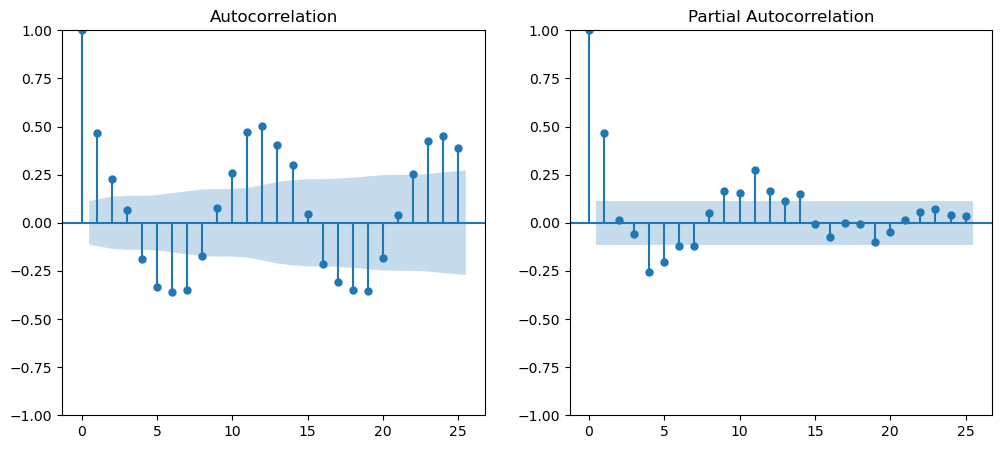

In [12]:
lf.plot_acf_pacf()

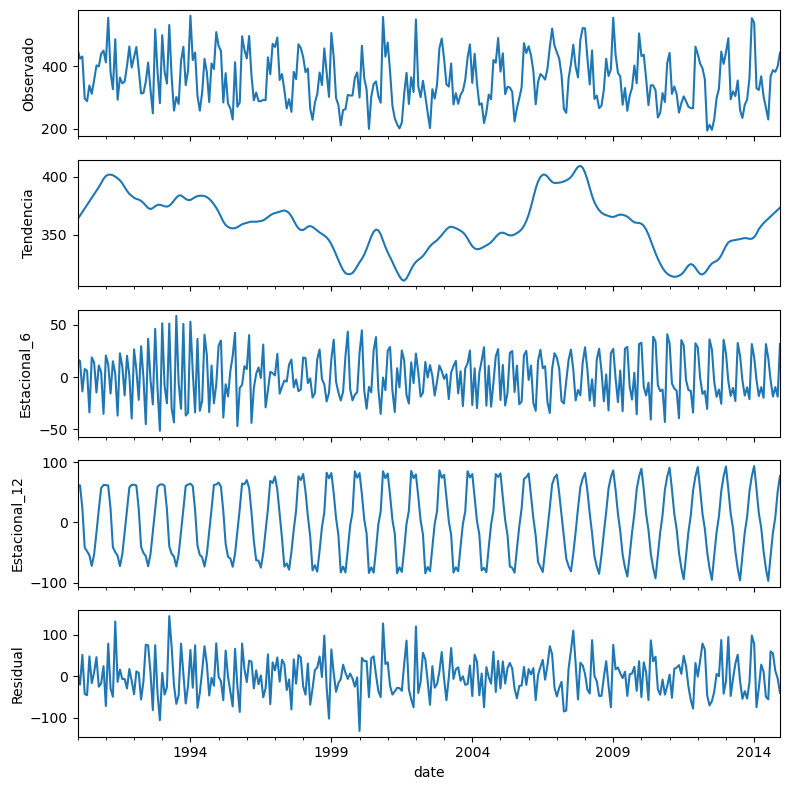

In [13]:
des = lf.decompose()

<Axes: xlabel='date'>

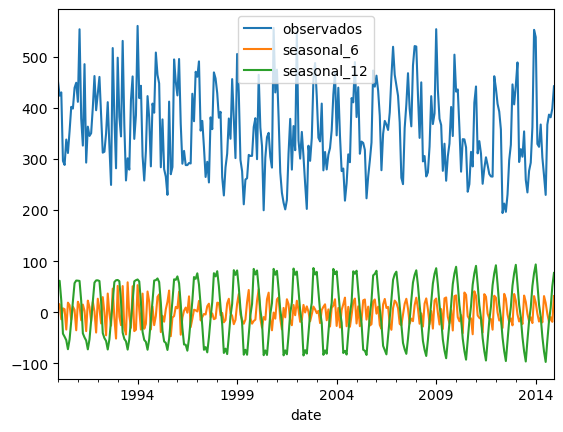

In [14]:
observ = des.observed.to_frame('observados').plot()

des.seasonal[:500].plot(ax=observ)

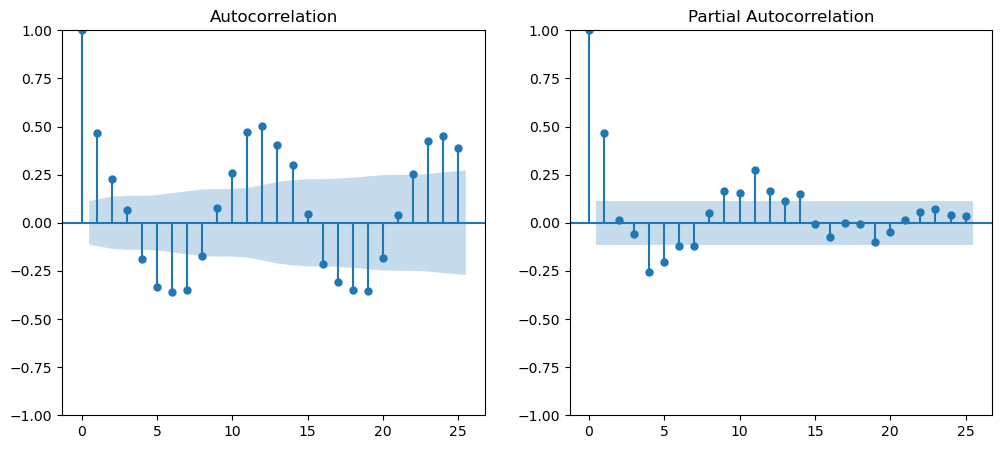

In [15]:
lf.plot_acf_pacf()

In [16]:
season_6 = des.seasonal['seasonal_6']
season_12 = des.seasonal['seasonal_12']

In [17]:
s_6 = LinearForecast(season_6)
s_12 = LinearForecast(season_12)

LinearForecast(season_6).adf_test()
LinearForecast(season_12).adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -9.45184075188356
p-valor: 4.59407954764207e-16
Valores Críticos:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
La serie es probablemente estacionaria.
Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -29.256349497755703
p-valor: 0.0
Valores Críticos:
   1%: -3.453670163592738
   5%: -2.8718077069772248
   10%: -2.5722411158835796
La serie es probablemente estacionaria.


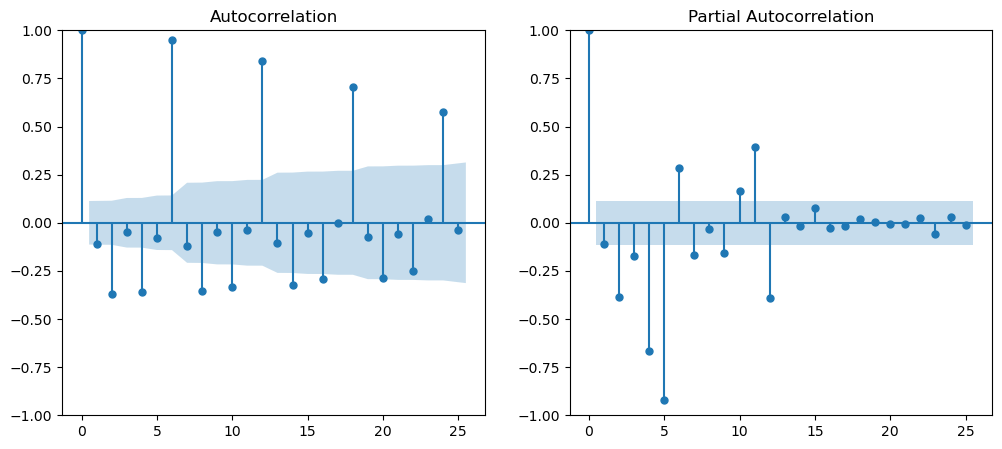

In [18]:
s_6.plot_acf_pacf()

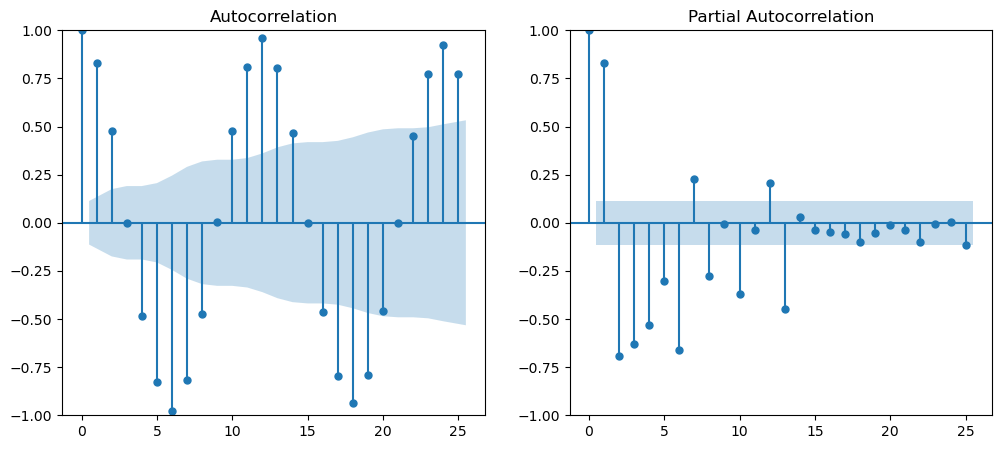

In [19]:
s_12.plot_acf_pacf()

<Axes: xlabel='date'>

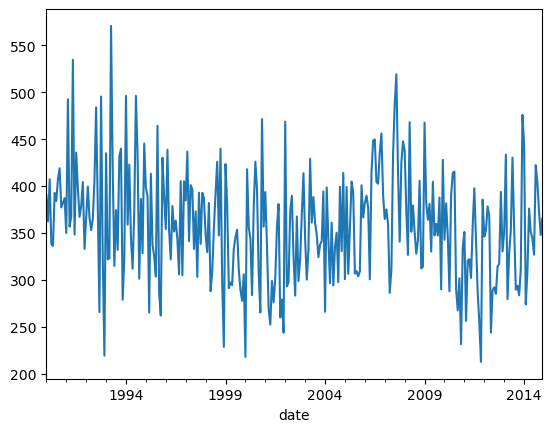

In [20]:
non_seasonal = des.observed - des.seasonal['seasonal_12']

non_seasonal.plot()

In [21]:
n_season = LinearForecast(non_seasonal)
n_season.adf_test()

Resultados del Test Aumentado de Dickey-Fuller:
Estadístico del Test: -4.543881965191807
p-valor: 0.00016369252610235545
Valores Críticos:
   1%: -3.452789844280995
   5%: -2.871421512222641
   10%: -2.5720351510944512
La serie es probablemente estacionaria.


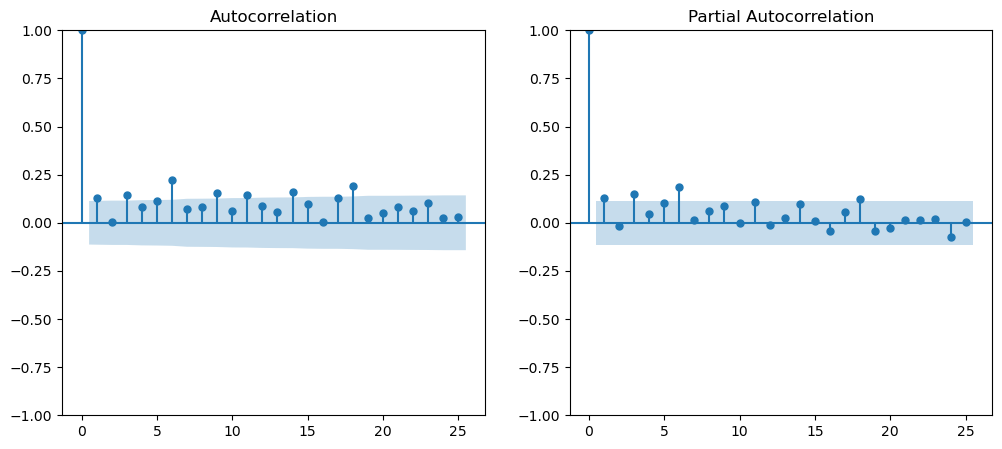

In [22]:
n_season.plot_acf_pacf()

In [32]:
p = [0, 1, 2]
d = [1]
q = [0, 1, 2]
# Parte estacional
P = [0, 1, 2]
D = [0]
Q = [0, 1, 2]
# Tipo de tendencia
t = ['n', 'c', 't', 'ct']


param_no_estacionales = list(itertools.product(p, d, q))
param_estacionales = [(x[0], x[1], x[2], 6 ) for x in list(itertools.product(P, D, Q))]
sarimax_params = list(itertools.product(param_no_estacionales, param_estacionales, t))
sarimax_params

[((0, 1, 0), (0, 0, 0, 6), 'n'),
 ((0, 1, 0), (0, 0, 0, 6), 'c'),
 ((0, 1, 0), (0, 0, 0, 6), 't'),
 ((0, 1, 0), (0, 0, 0, 6), 'ct'),
 ((0, 1, 0), (0, 0, 1, 6), 'n'),
 ((0, 1, 0), (0, 0, 1, 6), 'c'),
 ((0, 1, 0), (0, 0, 1, 6), 't'),
 ((0, 1, 0), (0, 0, 1, 6), 'ct'),
 ((0, 1, 0), (0, 0, 2, 6), 'n'),
 ((0, 1, 0), (0, 0, 2, 6), 'c'),
 ((0, 1, 0), (0, 0, 2, 6), 't'),
 ((0, 1, 0), (0, 0, 2, 6), 'ct'),
 ((0, 1, 0), (1, 0, 0, 6), 'n'),
 ((0, 1, 0), (1, 0, 0, 6), 'c'),
 ((0, 1, 0), (1, 0, 0, 6), 't'),
 ((0, 1, 0), (1, 0, 0, 6), 'ct'),
 ((0, 1, 0), (1, 0, 1, 6), 'n'),
 ((0, 1, 0), (1, 0, 1, 6), 'c'),
 ((0, 1, 0), (1, 0, 1, 6), 't'),
 ((0, 1, 0), (1, 0, 1, 6), 'ct'),
 ((0, 1, 0), (1, 0, 2, 6), 'n'),
 ((0, 1, 0), (1, 0, 2, 6), 'c'),
 ((0, 1, 0), (1, 0, 2, 6), 't'),
 ((0, 1, 0), (1, 0, 2, 6), 'ct'),
 ((0, 1, 0), (2, 0, 0, 6), 'n'),
 ((0, 1, 0), (2, 0, 0, 6), 'c'),
 ((0, 1, 0), (2, 0, 0, 6), 't'),
 ((0, 1, 0), (2, 0, 0, 6), 'ct'),
 ((0, 1, 0), (2, 0, 1, 6), 'n'),
 ((0, 1, 0), (2, 0, 1, 6), 'c'),
 ((

In [33]:
len(sarimax_params)

324

In [41]:
par_no_esta, par_esta, trend = (sarimax_params[0])
par_no_esta

(0, 1, 0)

In [79]:
data = data.drop(columns=['ln_y'])

In [84]:
train, test = LinearForecast(data).split_dataset()

In [81]:
train_log = np.log(train)

In [85]:
n = 5
res = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index=np.arange(0, len(sarimax_params)))

i = 0
for par_no_esta, par_esta, trend in sarimax_params:
    mod = SARIMAX(
        endog=train_log,
        trend=trend,
        order=par_no_esta,
        seasonal_order=par_esta
    )
    results = mod.fit(disp=False)

    res.loc[i, 'params'] = str((par_no_esta, par_esta, trend))
    res.loc[i, 'AIC'] = results.aic
    res.loc[i, 'BIC'] = results.bic
    res.loc[i, 'LLF'] = results.llf
    i += 1

C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Acer\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Lik

In [86]:
res.sort_values(by=['BIC'], ascending=True)

,params,AIC,BIC,LLF
160,"((1, 1, 1), (1, 0, 1, 6), 'n')",-151.185675,-133.803358,80.592838
268,"((2, 1, 1), (1, 0, 1, 6), 'n')",-150.384072,-129.525291,81.192036
196,"((1, 1, 2), (1, 0, 1, 6), 'n')",-149.434693,-128.575911,80.717346
68,"((0, 1, 1), (2, 0, 2, 6), 'n')",-149.212915,-128.354134,80.606457
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
...,...,...,...,...
31,"((0, 1, 0), (2, 0, 1, 6), 'ct')",-5.806042,15.05274,8.903021
34,"((0, 1, 0), (2, 0, 2, 6), 't')",-2.955843,17.902939,7.477921
23,"((0, 1, 0), (1, 0, 2, 6), 'ct')",-2.861924,17.996857,7.430962
323,"((2, 1, 2), (2, 0, 2, 6), 'ct')",-19.070852,19.170247,20.535426


In [87]:
res.sort_values(by=['AIC'], ascending=True)

,params,AIC,BIC,LLF
160,"((1, 1, 1), (1, 0, 1, 6), 'n')",-151.185675,-133.803358,80.592838
268,"((2, 1, 1), (1, 0, 1, 6), 'n')",-150.384072,-129.525291,81.192036
196,"((1, 1, 2), (1, 0, 1, 6), 'n')",-149.434693,-128.575911,80.717346
68,"((0, 1, 1), (2, 0, 2, 6), 'n')",-149.212915,-128.354134,80.606457
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
...,...,...,...,...
22,"((0, 1, 0), (1, 0, 2, 6), 't')",-4.808717,12.573601,7.404359
19,"((0, 1, 0), (1, 0, 1, 6), 'ct')",-3.248621,14.133697,6.624311
34,"((0, 1, 0), (2, 0, 2, 6), 't')",-2.955843,17.902939,7.477921
23,"((0, 1, 0), (1, 0, 2, 6), 'ct')",-2.861924,17.996857,7.430962


In [88]:
res.sort_values(by=['LLF'], ascending=True)

,params,AIC,BIC,LLF
18,"((0, 1, 0), (1, 0, 1, 6), 't')",-5.193999,8.711855,6.597
19,"((0, 1, 0), (1, 0, 1, 6), 'ct')",-3.248621,14.133697,6.624311
6,"((0, 1, 0), (0, 0, 1, 6), 't')",-7.340173,3.089218,6.670086
7,"((0, 1, 0), (0, 0, 1, 6), 'ct')",-5.395119,8.510735,6.69756
0,"((0, 1, 0), (0, 0, 0, 6), 'n')",-11.92438,-8.447917,6.96219
...,...,...,...,...
272,"((2, 1, 1), (1, 0, 2, 6), 'n')",-148.784881,-124.449636,81.392441
280,"((2, 1, 1), (2, 0, 1, 6), 'n')",-148.828341,-124.493096,81.41417
212,"((1, 1, 2), (2, 0, 2, 6), 'n')",-147.065443,-119.253734,81.532721
284,"((2, 1, 1), (2, 0, 2, 6), 'n')",-147.065819,-119.254111,81.53291


El mejor modelo es (0, 1, 0), (2, 0, 2, 6)

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........